In [1]:
#wrote by Eric Dolores
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA


#the following will simplify notation
testEval ={}
def matrixDef(B, y_train):
    A = np.matrix(B)
    tA = A.T
###At(A*x-b)
    bt=np.matrix(y_train)
    return A, tA, bt
def MSE(dif):
    Dif = dif*dif
    return sum(x for x in Dif)/len(Dif)



Homework 1:
Let’s practice gradient descent while studying the relationship between representational capacity and generalization error.

    Use algorithm 4.1 on page 96 of the Deep Learning book to develop your own code that solves the linear least squares problem.


Algorithm 4.1: An algorithm to minimize $f(x)=\frac{1}{2}||Ax-b||^2_2$ with respect to $x$ using gradient descend, starting from an arbitrary value of $x$.
    Set the step size $\epsilon$ and tolerance $\delta$ to small, positive numbers.
    
While $||A^T AX-A^T b||_2>\delta $ do $$x\leftarrow x-\epsilon(A^T AX-A^T b)$$    
end While

In [2]:
def minim(x, error, delta, A, b, tA):
    term1 = A*x-b
    term2 = tA*(term1)
    count = 1#to avoid cycles
    val = LA.norm( term2 )
    while val>delta:
        x = x-(error)*term2
        term1 = A*x-b
        term2 = tA*(term1)
        val = LA.norm(term2)
        count = count+1
        term2 = term2/(val+count/20)#This normalization prevents cycles
    return x    
    

Apply your code from above to the training data to learn a 0-degree polynomial model of the data-generating process.

In [3]:
def dataGen():

    num_train = 25
    num_test = 15
    x_0 = -10
    x_f = 10
    noise_amplitude = 200

    np.random.seed(1234)

    x_train = np.random.uniform(x_0, x_f, num_train)
    noise_train = np.random.uniform(-noise_amplitude, noise_amplitude, num_train)
    y_train = 2*x_train**3 + 5*x_train**2 + 9*x_train + 15 + noise_train

    x_test = np.random.uniform(x_0, x_f, num_test)
    noise_test = np.random.uniform(-noise_amplitude, noise_amplitude, num_test)
    y_test = 2*x_test**3 + 5*x_test**2 + 9*x_test + 15 + noise_test

#quick data normalization   
    x_train /= 10
    x_test /= 10
    y_train /= 1000
    y_test /= 1000

   # plt.scatter(x_train, y_train, color='b')
    #plt.scatter(x_test, y_test, color='r')
    
    #plt.show()
    return x_train, y_train, x_test, y_test

To approximate with a polynomial of degree 0, we ignore the x-values and consider only the best approximation to the y-values.

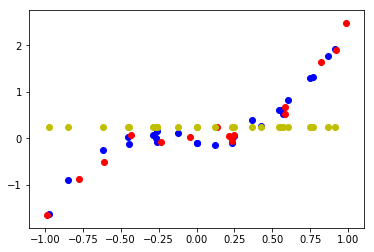

In [4]:
x_train, y_train, x_test, y_test = dataGen()
x = np.matrix('1')
error = 1
delta = .5
B = [[1] for num in x_train]
A = np.matrix(B)
tA = A.T
###At(A*x-b)
bt=np.matrix(y_train)

sol = minim(x, error, delta, A, bt.T, tA)

degree0 = [sol for x in x_train]
plt.scatter(x_train, y_train, color='b')
plt.scatter(x_test, y_test, color='r')
plt.scatter(x_train, degree0, color='y')    
plt.show()


Test the performance of your linear least squares solution. I.e., calculate the mean squared error of your trained model’s predictions on the test data.

In [5]:
dif = np.array([(sol - y) for y in y_train])
Dif = dif*dif
ev1 = sum(x for x in Dif)/len(Dif)


dif = np.array([(sol - y) for y in y_test])
Dif = dif*dif
ev2 = sum(x for x in Dif)/len(Dif)

testEval[0]=[ev1, ev2]
print('Test performance for degree 0:train {}, test {}'.format( ev1,ev2))


Test performance for degree 0:train [[ 0.56109386]], test [[ 1.05034766]]


Repeat steps 1-3 five times: each time increasing the degree of the polynomial model that your algorithm learns in step 2. Record your training error, test error, and the degree of the polynomial used. Plot these results to obtain a figure similar to Figure 5.3 on page 115 of the Deep Learning.

Here we see the linear case:

f = [[ 1.25443392]]X+[[ 0.1182749]] 


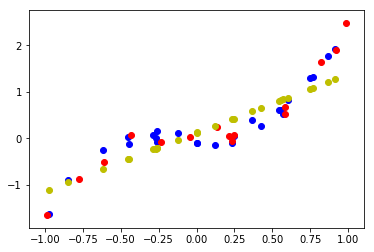

Test performance for degree 1:train [[ 0.20633175]], test [[ 1.05034766]]


In [6]:
x_train, y_train, x_test, y_test= dataGen()
x = np.matrix('1; 1')
B = [[num,1] for num in x_train]#self note: this was a mistake, the more natural [1, num] makes easier the indexing in the future

A = np.matrix(B)
tA = A.T
###At(A*x-b)
bt = np.matrix(y_train)

sol = minim(x, error, delta, A, bt.T, tA)
print("f = {}X+{} ".format(sol[0],sol[1]))    

plt.scatter(x_train, y_train, color='b')
plt.scatter(x_test, y_test, color='r')
s = [sol[0]*this+sol[1] for this in x_train]
plt.scatter(x_train, s, color='y')    
plt.show()

dif = np.array([sol[0]*x_train[j]+sol[1] - y_train[j] for j in range(len(x_train))])
Dif = dif*dif
ev1 = sum(x for x in Dif)/len(Dif)

dif = np.array([sol[0]*x_test[j]+sol[1] - y_test[j] for j in range(len(x_test))])
Dif = dif*dif
ev1 = sum(x for x in Dif)/len(Dif)

testEval[1]=[ev1, ev2]
print('Test performance for degree 1:train {}, test {}'.format( ev1,ev2))



f(X) =[[ 0.31662846]]X**2 + [[ 1.23390083]]X + [[ 0.03004351]]


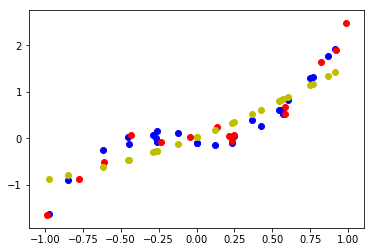

Test performance for degree 2: train [[ 0.11000851]], test [[ 0.17468236]]


In [7]:
##Cuadratic:

x = np.matrix('1; 1; 1')
B = [[num*num,num,1] for num in x_train]
A, tA, bt = matrixDef(B,y_train) #See linear case

sol = minim(x, error, delta, A, bt.T, tA)
print("f(X) ={}X**2 + {}X + {}".format(sol[0],sol[1], sol[2]))    

plt.scatter(x_train, y_train, color='b')
plt.scatter(x_test, y_test, color='r')
s = [sol[0]*this*this+sol[1]*this+sol[2] for this in x_train]
plt.scatter(x_train, s, color='y')    
plt.show()

dif = np.array([sol[0]*x_train[j]*x_train[j]+sol[1]*x_train[j]+sol[2] - y_train[j] for j in range(len(x_train))])
ev1=MSE(dif)

dif = np.array([sol[0]*x_test[j]*x_test[j]+sol[1]*x_test[j]+sol[2] - y_test[j] for j in range(len(x_test))])
ev2=MSE(dif)
print('Test performance for degree 2: train {}, test {}'.format(ev1, ev2))    


testEval[2]=[ev1, ev2]

f(X) =[[ 2.15129603]]X**3 +[[ 0.47595584]]X**2 + [[ 0.01286164]]X + [[ 0.03937693]]


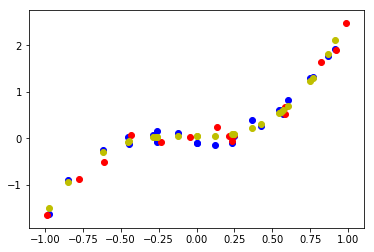

Test performance for degree 3: train [[ 0.010156]], test [[ 0.01628928]]


In [8]:
##Cubic:

x = np.matrix('1; 1; 1;1')
error=1
delta=.5
B = [[num*num*num,num*num,num,1] for num in x_train]
A, tA, bt = matrixDef(B,y_train) #See linear case

sol = minim(x, error, delta, A, bt.T, tA)
print("f(X) ={}X**3 +{}X**2 + {}X + {}".format(sol[0],sol[1],sol[2], sol[3]))    

plt.scatter(x_train, y_train, color='b')
plt.scatter(x_test, y_test, color='r')
s = [sol[0]*this*this*this+sol[1]*this*this+sol[2]*this+sol[3] for this in x_train]
plt.scatter(x_train, s, color='y')    
plt.show()

dif = np.array([sol[0]*x_train[j]*x_train[j]*x_train[j]+sol[1]*x_train[j]*x_train[j]+sol[2]*x_train[j]+sol[3] - y_train[j] for j in range(len(x_test))])
ev1=MSE(dif)

dif = np.array([sol[0]*x_test[j]*x_test[j]*x_test[j]+sol[1]*x_test[j]*x_test[j]+sol[2]*x_test[j]+sol[3] - y_test[j] for j in range(len(x_test))])
ev2=MSE(dif)
print('Test performance for degree 3: train {}, test {}'.format(ev1, ev2))    



testEval[3]=[ev1, ev2]

f(X) =[[-0.54430712]]X**4 +[[ 2.13444372]]X**3 +[[ 0.91225558]]X**2 + [[-0.00796041]]X + [[-0.03155241]]


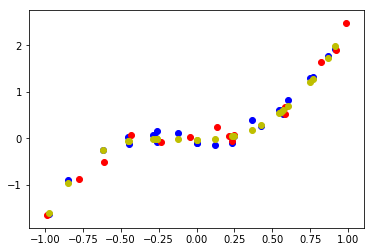

Test performance for degree 4: train [[ 0.00808723]], test [[ 0.01662144]]


In [9]:
#4th degree:

x = np.matrix('1; 1; 1;1;1')
error=1
delta=.5
B = [[num**4, num**3, num*num, num, 1] for num in x_train]
A, tA, bt = matrixDef(B,y_train) #See linear case

sol = minim(x, error, delta, A, bt.T, tA)
print("f(X) ={}X**4 +{}X**3 +{}X**2 + {}X + {}".format(sol[0],sol[1],sol[2], sol[3], sol[4]))    

plt.scatter(x_train, y_train, color='b')
plt.scatter(x_test, y_test, color='r')
s = [sol[0]*this**4+sol[1]*this**3+sol[2]*this**2+sol[3]*this**1+sol[4] for this in x_train]
plt.scatter(x_train, s, color='y')    
plt.show()

dif = np.array([sol[0]*x_train[j]**4+sol[1]*x_train[j]**3+sol[2]*x_train[j]**2+sol[3]*x_train[j]**1+sol[4] - y_train[j] for j in range(len(x_train))])
ev1=MSE(dif)

dif = np.array([sol[0]*x_test[j]**4+sol[1]*x_test[j]**3+sol[2]*x_test[j]**2+sol[3]*x_test[j]**1+sol[4] - y_test[j] for j in range(len(x_test))])
ev2=MSE(dif)
print('Test performance for degree 4: train {}, test {}'.format(ev1, ev2))    



testEval[4]=[ev1, ev2]

f(X) =[[ 0.7820704]]X**5 +[[-0.51182207]]X**4 +[[ 1.28199009]]X**3 +[[ 0.9271816]]X**2 + [[ 0.16876415]]X + [[ 0.00280125]]


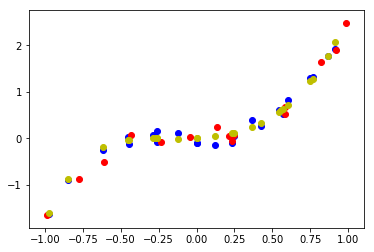

Test performance for degree 5: train [[ 0.0098051]], test [[ 0.02243206]]


In [10]:
#5th degree:

x = np.matrix('1; 1; 1; 1; 1; 1')
error=1
delta=.5
B = [[num**5, num**4, num**3, num*num, num, 1] for num in x_train]
A, tA, bt = matrixDef(B,y_train) #See linear case

sol = minim(x, error, delta, A, bt.T, tA)
print("f(X) ={}X**5 +{}X**4 +{}X**3 +{}X**2 + {}X + {}".format(sol[0],sol[1],sol[2], sol[3], sol[4], sol[5]))    

plt.scatter(x_train, y_train, color='b')
plt.scatter(x_test, y_test, color='r')
s = [sol[0]*this**5+sol[1]*this**4+sol[2]*this**3+sol[3]*this**2+sol[4]*this**1+sol[5] for this in x_train]
plt.scatter(x_train, s, color='y')    
plt.show()

dif = np.array([sol[0]*x_train[j]**5+sol[1]*x_train[j]**4+sol[2]*x_train[j]**3+sol[3]*x_train[j]**2+sol[4]*x_train[j]**1+sol[5] - y_train[j] for j in range(len(x_train))])
ev1=MSE(dif)

dif = np.array([sol[0]*x_test[j]**5+sol[1]*x_test[j]**4+sol[2]*x_test[j]**3+sol[3]*x_test[j]**2+sol[4]*x_test[j]**1+sol[5] - y_test[j] for j in range(len(x_test))])
ev2=MSE(dif)
print('Test performance for degree 5: train {}, test {}'.format(ev1, ev2))    



testEval[5]=[ev1, ev2]

f(X) = [[-0.45682323]]X**6 +[[ 0.76609316]]X**5 +[[-0.18881084]]X**4 +[[ 1.27234855]]X**3 +[[ 0.95891533]]X**2 + [[ 0.15673974]]X + [[-0.04124949]]


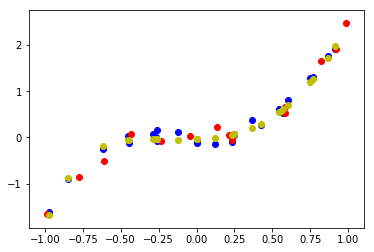

Test performance for degree 6: train [[ 0.00925834]], test [[ 0.02391708]]


In [11]:
#6th degree:

x = np.matrix('1; 1; 1; 1; 1; 1;1')
error=1
delta=.5
B = [[num**6,num**5, num**4, num**3, num*num, num, 1] for num in x_train]
A, tA, bt = matrixDef(B,y_train) #See linear case

sol = minim(x, error, delta, A, bt.T, tA)
print("f(X) = {}X**6 +{}X**5 +{}X**4 +{}X**3 +{}X**2 + {}X + {}".format(sol[0],sol[1],sol[2], sol[3], sol[4], sol[5], sol[6]))    

plt.scatter(x_train, y_train, color='b')
plt.scatter(x_test, y_test, color='r')
s = [sol[0]*this**6+sol[1]*this**5+sol[2]*this**4+sol[3]*this**3+sol[4]*this**2+sol[5]*this+sol[6] for this in x_train]
plt.scatter(x_train, s, color='y')    
plt.show()

dif = np.array([sol[0]*x_train[j]**6+sol[1]*x_train[j]**5+sol[2]*x_train[j]**4+sol[3]*x_train[j]**3+sol[4]*x_train[j]**2+sol[5]*x_train[j]+sol[6] - y_train[j] for j in range(len(x_train))])
ev1=MSE(dif)

dif = np.array([sol[0]*x_test[j]**6+sol[1]*x_test[j]**5+sol[2]*x_test[j]**4+sol[3]*x_test[j]**3+sol[4]*x_test[j]**2+sol[5]*x_test[j]**1+sol[6] - y_test[j] for j in range(len(x_test))])
ev2=MSE(dif)
print('Test performance for degree 6: train {}, test {}'.format(ev1, ev2))    



testEval[6]=[ev1, ev2]

f(X) = [[ 0.21646817]]X**7 +[[-0.43063155]]X**6 +[[ 0.55578955]]X**5 +[[-0.18745706]]X**4 +[[ 1.26267266]]X**3 +[[ 0.96293678]]X**2 + [[ 0.18738143]]X + [[-0.00955999]]


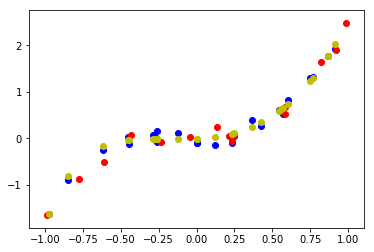

Test performance for degree 7: train [[ 0.00963974]], test [[ 0.02609671]]


In [12]:
#7th degree:

x = np.matrix('1; 1; 1; 1; 1; 1; 1; 1')
error=1
delta=.5
B = [[num**7,num**6,num**5, num**4, num**3, num*num, num, 1] for num in x_train]
A, tA, bt = matrixDef(B,y_train) #See linear case

sol = minim(x, error, delta, A, bt.T, tA)
print("f(X) = {}X**7 +{}X**6 +{}X**5 +{}X**4 +{}X**3 +{}X**2 + {}X + {}".format(sol[0],sol[1],sol[2], sol[3], sol[4], sol[5], sol[6], sol[7]))    

plt.scatter(x_train, y_train, color='b')
plt.scatter(x_test, y_test, color='r')
s = [sol[0]*this**7+sol[1]*this**6+sol[2]*this**5+sol[3]*this**4+sol[4]*this**3+sol[5]*this**2+sol[6]*this**1+sol[7] for this in x_train]
plt.scatter(x_train, s, color='y')    
plt.show()

dif = np.array([sol[0]*x_train[j]**7+sol[1]*x_train[j]**6+sol[2]*x_train[j]**5+sol[3]*x_train[j]**4+sol[4]*x_train[j]**3+sol[5]*x_train[j]**2+sol[6]*x_train[j]**1+sol[7] - y_train[j] for j in range(len(x_train))])
ev1=MSE(dif)

dif = np.array([sol[0]*x_test[j]**7+sol[1]*x_test[j]**6+sol[2]*x_test[j]**5+sol[3]*x_test[j]**4+sol[4]*x_test[j]**3+sol[5]*x_test[j]**2+sol[6]*x_test[j]**1+sol[7] - y_test[j] for j in range(len(x_test))])
ev2=MSE(dif)
print('Test performance for degree 7: train {}, test {}'.format(ev1, ev2))    



testEval[7]=[ev1, ev2]


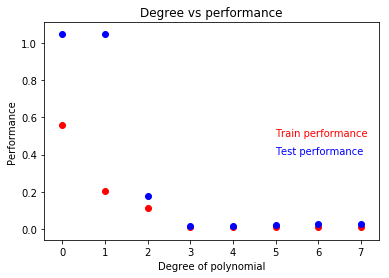

In [13]:
degree = [0, 1, 2, 3, 4, 5, 6, 7]
train_val=[testEval[i][0] for i in degree]
test_val=[testEval[i][1] for i in degree]

plt.scatter(degree,train_val , color='r')
plt.scatter(degree, test_val, color='b')
plt.title("Degree vs performance")
plt.xlabel("Degree of polynomial")
plt.text(5, .5, 'Train performance', color='red')
plt.text(5, .4, 'Test performance', color='blue')
plt.ylabel("Performance")
plt.show()

Interpret your graphed results. For example, when do underfitting and overfitting occur? Which model has the lowest test error? Does this make sense given what you know about the data-generating process?

For lower degrees the model is hard to generalize, that is why the train performance and the test performance vary so much.

When the degree of the polynomial is bigger than the real degree, the generalization is less accurate, as the following graphs show us.

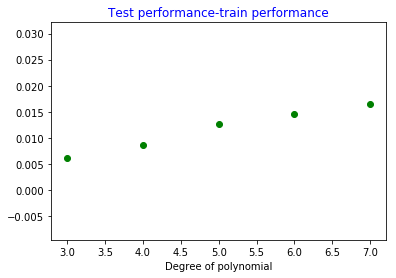

In [14]:
degreec = degree[3:]
x=[[testEval[i][1]-testEval[i][0]] for i in degreec]
plt.scatter(degreec,x, color='g')
plt.xlabel("Degree of polynomial")

plt.title( 'Test performance-train performance', color='blue')
plt.show()

There is underfitting with degrees lower than 3. It is not clear that with the increase of degree, the train MSE decreases but this may be a precision error (see next graph).

Over fitting will be with degrees lower than 3 and for very high degrees.


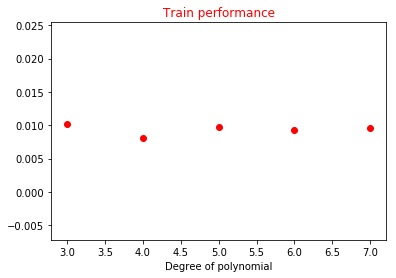

In [15]:
degreed = degree[3:]
x=[[testEval[i][0]] for i in degreed]
plt.scatter(degreed,x, color='r')
plt.xlabel("Degree of polynomial")

plt.title( 'Train performance', color='red')
plt.show()